In [17]:
import import_ipynb
import data_exploration

# Now you can use variables like:
X_seq = data_exploration.X_seq
Y_seq = data_exploration.Y_seq
time_steps = data_exploration.time_steps

In [18]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_seq.shape[2])),  
    Dropout(0.2),  # Dropout for regularization
    LSTM(64, return_sequences=False),  
    Dropout(0.2),
    Dense(32, activation='relu'),  
    Dense(1)  # Output layer (Predicting the "Close" price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

print("✅ LSTM model defined and compiled!")


✅ LSTM model defined and compiled!


c:\Users\chira\OneDrive\Documents\SEM6\CS 354N\ML LEARNING\backtest-and-risk-assessment\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_seq, Y_seq, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

print("✅ Model training completed!")


Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.9136e-04 - val_loss: 3.9606e-04
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4960e-04 - val_loss: 6.7194e-04
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.9296e-04 - val_loss: 4.2271e-04
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2678e-04 - val_loss: 4.1489e-04
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9327e-04 - val_loss: 4.7591e-04
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.7137e-04 - val_loss: 4.6691e-04
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4201e-04 - val_loss: 5.7248e-04
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.3766e-04 - val_loss: 7.2579e-04
Epoch 9/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 2.2445e-04 - val_loss: 3.5791e-04
Epoch 10/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 2.1997e-04 - val_loss: 6.3273e-04
Epoch 11/50
122/140 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/

In [24]:
# Save the trained LSTM model
model.save("../models/lstm_model.h5")

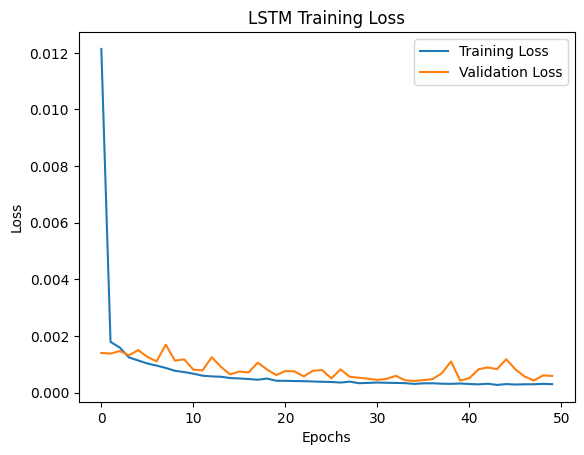

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()


In [21]:
# Load processed data
X = np.load("../data/X.npy")
Y = np.load("../data/Y.npy")

# Load the saved scaler
scaler = joblib.load("../models/scaler.pkl")

print("✅ Preprocessed data loaded successfully!")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

✅ Preprocessed data loaded successfully!
X shape: (5001, 5)
Y shape: (5001,)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


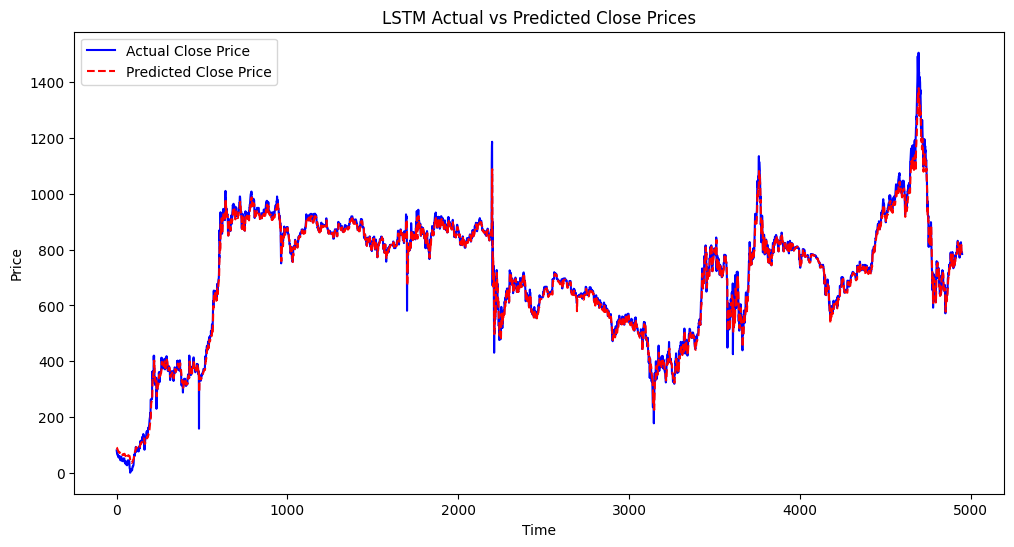

In [26]:
# Make predictions on training data
train_predictions = model.predict(X_seq)

# Inverse transform to get actual price values
train_predictions = scaler.inverse_transform(
    np.concatenate((np.zeros((train_predictions.shape[0], X_seq.shape[2] - 1)), train_predictions), axis=1)
)[:, -1]  # Extract the last column (Close price)

actual_prices = scaler.inverse_transform(
    np.concatenate((np.zeros((Y_seq.shape[0], X_seq.shape[2] - 1)), Y_seq.reshape(-1, 1)), axis=1)
)[:, -1]  # Extract actual Close price

# Plot Actual vs Predicted Close Prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Close Price", color="blue")
plt.plot(train_predictions, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.title("LSTM Actual vs Predicted Close Prices")
plt.show()
